# Capstone 1 Project: Milestone Report

## 1. Introduction

On Jan 23rd, 2018, New York City filed a lawsuit against the manufacturers and distributors of commonly-abused prescription painkillers, with Mayor Bill de Blasio stating that “more New Yorkers have died from opioid overdoses than car crashes and homicides combined in recent years” [1]. 
 
The detrimental effects of prescription medications span far beyond NYC. According to the National Institute on Drug Abuse, over 70,200 Americans died from a drug overdose in 2017, which is almost double the number recorded in 2007 [2]. Opioids—mainly synthetic opioids (other than methadone)—are currently the main driver of drug overdose deaths in the U.S. [3].   
 
Besides painkillers like opioids, Adderall, which is used to treat attention-deficit/hyperactive disorder (ADHD) a lesser-known but growing concern. The prescription of Adderall, which is known as the “study drug”, is fast-growing and could catch up with that of opioids if nothing is done to check it. A reported 16 million prescriptions of Adderall were written in 2012, with sales quintupled from < `$`2 billion in 2002 to over `$`8 billion in 2012 [4].    
 
Antibiotics are another frequently prescribed drug, despite over a quarter of doctors saying that antibiotics are often administered even though they will do no good, leading to waste in the healthcare system [5].


### 1.1 Objectives

The objectives of this project are:

* to explore a sample dataset containing anonymized physician identities and their monthly patient volumes and payments received for Adderall, antibiotics and opioids. 
* to generate a classification system for physicians based on their prescription patterns
* to generate time series forecasts of patient volumes and payments if the prescription patterns continue without intervention

In this Milestone Report, we will present a description of the data set __(Section 2)__, the steps for data cleaning and wrangling __(Section 3)__, develop a data story which includes exploratory data analysis (EDA) and statistical analysis __(Section 4)__, and outline the next steps of this project __(Chapter 5)__.

### 1.2	Significance

Addressing what has inherently become an over-prescription epidemic [6], is no small task. Nonetheless, developing a pattern recognition classification system that helps to identify physicians that are likely over-prescribing medications can go a long way in mitigating the problem. Such a system can help:

* Patients make better decisions when selecting health care providers
* Insurance companies to flag over-prescribers and withhold payment for over-prescribed drugs, which ultimately protects patients and saves money  
* Pharmaceutical companies and regulatory agencies to be more proactive in monitoring drug sales and minimizing abuse

### 1.3	References

[1] https://www.wsj.com/articles/new-york-city-sues-companies-over-opioid-abuse-1516734990 <br>
[2]https://www.drugabuse.gov/related-topics/trends-statistics/overdose-death-rates <br>
[3]https://www.cdc.gov/drugoverdose/data/statedeaths.html <br>
[4]https://www.nytimes.com/2013/12/15/health/the-selling-of-attention-deficit-disorder.html?pagewanted=all&_r=2 <br>
[5] https://www.cbsnews.com/news/doctors-still-overprescribing-drugs-antibiotics/ <br>
[6] https://www.statnews.com/2019/04/02/overprescribed-americas-other-drug-problem/ <br>

## 2. Dataset

The dataset used in this project is a sample construct based on real data from a domain that requires paid access. The data contains prescription information for patient monthly volumes and payments received for Adderall, antibiotics and opioid prescriptions by 3010 anonymized physicians from Jan-2015 to Oct-2017. The link to the dataset is here:
https://raw.githubusercontent.com/nwugocc/Capstone-Project-1/master/data/data1.txt

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

In [2]:
# Importing the dataset
filepath = 'https://raw.githubusercontent.com/nwugocc/Capstone-Project-1/master/data/data1.txt'
file = 'data/data1.txt'
df1 = pd.read_csv(filepath, index_col='yrmo', parse_dates=True).sort_index()
df1.index.name = 'Date'
df1.shape

(42074, 7)

## 3. Data Cleaning and Wrangling

The purpose of the data cleaning and wrangling steps are:
1.	To ensure that all features are of the correct data type
2.	To ensure missing data are properly imputed
3.	To create additional potentially useful features
4.	To prepare the dataset for exploratory data analysis (EDA) and statistical analysis

### 3.1	Data Type Correction

During dataset importation, the yrmo column was parsed as a pandas datetime object, renamed as “Date”, and set as the data frame index. 

In [3]:
df1.columns = [i.lower() for i in df1.columns]
df1.head()

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,6vFQfkVIyHglLHjv,NaN,NaN,4.0,2439.0,2.0,2.0
2015-01-01,KtIQV9FihhozcS4O,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,nh9P8B7ik2qYlruB,6.0,791.0,9.0,5760.0,3.0,174.0
2015-01-01,1fZbRx3Qm2h2rmPP,NaN,NaN,1.0,97.0,NaN,NaN
2015-01-01,UY8bW4koFtgJI8J7,10.0,16299.0,NaN,NaN,NaN,NaN


### 3.2	Missing Values Imputation

Since not all physicians prescribed all three drugs every month, it was expected that there would be null entries for patient volume and payment for the months that a given drug was not prescribed by a physician. Nonetheless, 3 months were identified for antibiotics that had patient entries without corresponding payment entries. These rows were found to be associated with the same physician id, “GLwAKSb708GXX52I”. 

A sliced portion of the dataset with only the prescription history of said physician showed revealed 11 rows of data with antibiotic monthly patient volumes of 1 or 2 for the months without missing payments but antibiotic patient volumes of 57, 72 and 86 for the months with missing payment entries. The significant difference between the patient volumes for the missing payment entries and the none missing payments entries suggests that these rows are missing at random and will need to be imputed rather than deleted. 

Based on the limited antibiotic entries for this physician, the suggested imputation method for the missing payment values was to calculate the average payment per patient for antibiotics from the entire dataset and use that value to multiply the number of antibiotic patients.    

In [4]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39826 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [5]:
# Locating the 3 null 'antibiopayments' entries
df1.loc[(df1.antibiopayments.isnull() & df1.antibiopatients.notnull()), :]

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-02-01,GLwAKSb708GXX52I,NaN,NaN,57.0,NaN,NaN,NaN
2015-03-01,GLwAKSb708GXX52I,NaN,NaN,72.0,NaN,NaN,NaN
2015-04-01,GLwAKSb708GXX52I,NaN,NaN,86.0,NaN,NaN,NaN


In [6]:
# Slicing out the prescription history of physicianid 'GLwAKSb708GXX52I'
df1.loc[df1.physicianid == 'GLwAKSb708GXX52I']

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-02-01,GLwAKSb708GXX52I,NaN,NaN,57.0,NaN,NaN,NaN
2015-03-01,GLwAKSb708GXX52I,NaN,NaN,72.0,NaN,NaN,NaN
2015-04-01,GLwAKSb708GXX52I,NaN,NaN,86.0,NaN,NaN,NaN
2015-05-01,GLwAKSb708GXX52I,57.0,423705.0,1.0,0.0,57.0,1934522.0
2015-06-01,GLwAKSb708GXX52I,59.0,267835.0,NaN,NaN,NaN,NaN
2015-07-01,GLwAKSb708GXX52I,61.0,716783.0,NaN,NaN,NaN,NaN
2015-08-01,GLwAKSb708GXX52I,78.0,681139.0,2.0,2940.0,77.0,2756712.0
2015-09-01,GLwAKSb708GXX52I,85.0,572423.0,NaN,NaN,NaN,NaN
2015-10-01,GLwAKSb708GXX52I,97.0,770021.0,NaN,NaN,NaN,NaN


In [7]:
# making a copy of df1: df2
df2 = df1.copy()

In [8]:
# Computing average payment per patient for antibiotics: antibio_payrate
antibio_payrate = np.mean(df1['antibiopayments'] / df1['antibiopatients'])

# Imputing missing antibiopayments values
df2['antibiopayments']= df2.apply(
    lambda row: antibio_payrate * row.antibiopatients if np.isnan(row.antibiopayments) else row.antibiopayments, axis=1)

In [9]:
# Confirming imputation of missing antibiopayments values
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39829 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


### 3.3	Incorrect Data Entry Correction

An investigation of the minimum and maximum values in each column revealed a “0” minimum entry for opioid patients associated with physician id “wwyJwO6CL1dqIooh”. This entry was accompanied by an opioid payment entry of `$`63451. A sliced portion of the dataset with only the prescription history of said physician showed that the physician only prescribed opioids with monthly patient volumes ranging from 2 to 145. The data also suggested a significant correlation between the monthly patient volumes and payments for the said physician. This was confirmed by a Pearson correlation coefficient of 0.85 between monthly payments and patient volumes.

In [10]:
# Initial descriptive statistics analysis to examine means, minimum and maximum values
df2.describe() 

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,23889.000000,2.388900e+04,39829.000000,3.982900e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.168274e+04,3.095249,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.380979e+04,6.943019,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,0.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.030000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.908000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430600e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


In [11]:
# Locating the "0" minmum entry for opioidpatients
df2[df2.opioidpatients == 0]

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-02-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,0.0,63451.0


In [12]:
# Slicing out the prescription history of physicianid 'wwyJwO6CL1dqIooh'
df2[df2['physicianid'] == 'wwyJwO6CL1dqIooh']

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,13.0,15443.0
2015-02-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,0.0,63451.0
2015-03-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,35.0,16468.0
2015-04-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,106.0,283647.0
2015-05-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,78.0,208911.0
2015-06-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,85.0,348662.0
2015-07-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,40.0,56072.0
2015-08-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,50.0,204671.0
2015-09-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,110.0,763563.0


Since there was a significant payment amount associated with the “0” patient volume entry, the “0” was considered to be an error and linear regression interpolation was the suggested method to use for imputation.

Pearson correlation coefficent = 0.8517051540283693


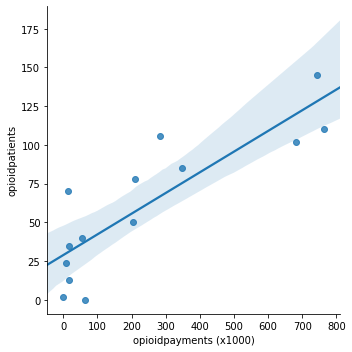

In [13]:
# Calculating correlation coefficenr of physicianid ''wwyJwO6CL1dqIooh' patient volumes and payments
physid_wwy = df2.loc[(df2.physicianid == 'wwyJwO6CL1dqIooh'),['opioidpatients','opioidpayments']]
wwy_r = np.corrcoef(physid_wwy.opioidpayments, physid_wwy.opioidpatients)
print('Pearson correlation coefficent =',wwy_r[0,1])

# Regression plot of patient volumes and payments for physicianid 'wwyJwO6CL1dqIooh' 
physid_wwy = df2.loc[df2.physicianid == 'wwyJwO6CL1dqIooh'][['opioidpatients','opioidpayments']]
phys_ww = physid_wwy.copy()
phys_ww['opioidpayments'] = phys_ww['opioidpayments'] / 1000
sns.lmplot(x='opioidpayments', y='opioidpatients', data=phys_ww)
plt.xlabel('opioidpayments (x1000)');

In [14]:
# Extracting the slope and intercept parameters
slope, intercept = np.polyfit(physid_wwy['opioidpayments'],physid_wwy['opioidpatients'], 1)
val = slope * 63451 + intercept
val

37.373342633106645

In [15]:
# Imputing the zero 'opioidpatients' value using linear regression
slope, intercept = np.polyfit(physid_wwy['opioidpayments'],physid_wwy['opioidpatients'], 1)
df2.loc[(df2.physicianid == 'wwyJwO6CL1dqIooh') & (df1.opioidpatients == 0), 'opioidpatients'] = val

In [16]:
# Confirming that the zero 'opioidpatients' value is replaced with the val = 37.3733...
df2[df2['physicianid'] == 'wwyJwO6CL1dqIooh'].head()

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,13.000000,15443.0
2015-02-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,37.373343,63451.0
2015-03-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,35.000000,16468.0
2015-04-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,106.000000,283647.0
2015-05-01,wwyJwO6CL1dqIooh,NaN,NaN,NaN,NaN,78.000000,208911.0


## 4. Data Story

### 4.1	Descriptive Summary Statistics of the Raw Dataset

After imputations (from section 3), only the mean monthly antibiotic payments marginally increased 21682 from 21666, confirming that imputation process did not significantly change the data.

In [17]:
# Descriptive statistics of df2
df2.describe()

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,23889.000000,2.388900e+04,39829.000000,3.982900e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.168274e+04,3.098218,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.380979e+04,6.949683,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,1.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.030000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.908000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430600e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


Hence, the initial summary statistics of the dataset showed that on average:
* physicians saw about 5 adderall patients and charged about 1828 per month
* physicians saw about 6 antibiotic patients and charged about 21682 per month
* physicians saw about 3 opioid patients and charged about 2980 per month
Monthly patient volumes and payments showed considerable variation. The coefficient of variation analysis showed that monthly payments for opioids had the largest variation with a coefficient of variation of 21.5 followed by monthly payments for adderall, which had a coefficient of variation of 12.54.

Interestingly, it appears physicians received higher payments per patient for prescribing antibiotics compared to adderall or opioid. Likewise, it appears physicians received higher payments per patient for prescribing opioids compared to adderall. This could be because antibiotic and opioid prescribing physicians might prefer to prescribe more expensive branded products or might be overprescribing drugs to repeat patients.

The negative minimum monthly payments observed for drug types are suggested to result from patients that are unable to pay and the healthcare provider had to absolve the cost.

In [18]:
# Calculating Coefficient of variation
drugs = ['adderall', 'antibio', 'opioid']

for drug in drugs:
    for col in df2.columns[1:]:
        if drug + 'patients' in col:
            print('Coefficent of variation in monthly patient volumes for %s = %.2f' % (drug, st.variation(df2[col].dropna())))
        elif drug + 'payments' in col:
            print('Coefficent of variation in monthly payments for %s = %.2f' % (drug, st.variation(df2[col].dropna())))

Coefficent of variation in monthly patient volumes for adderall = 1.88
Coefficent of variation in monthly payments for adderall = 12.54
Coefficent of variation in monthly patient volumes for antibio = 2.00
Coefficent of variation in monthly payments for antibio = 3.87
Coefficent of variation in monthly patient volumes for opioid = 2.24
Coefficent of variation in monthly payments for opioid = 21.55


### 4.2	Estimating Probability Distributions of Variables

By extracting parameters from observed data and using those parameters to generate random variates, it was determined that the probability distributions of log transformed values of monthly patient volumes appeared to have exponential distributions while that of monthly payments appeared to follow normal distributions.

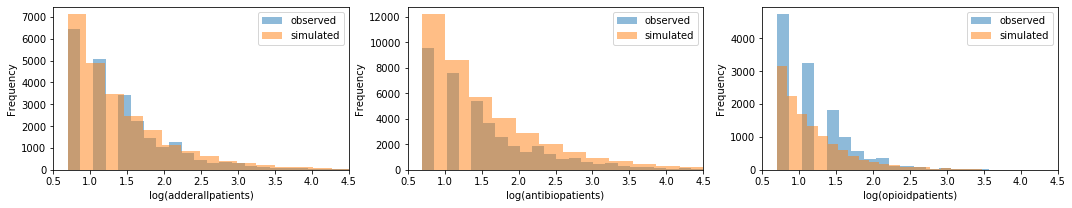

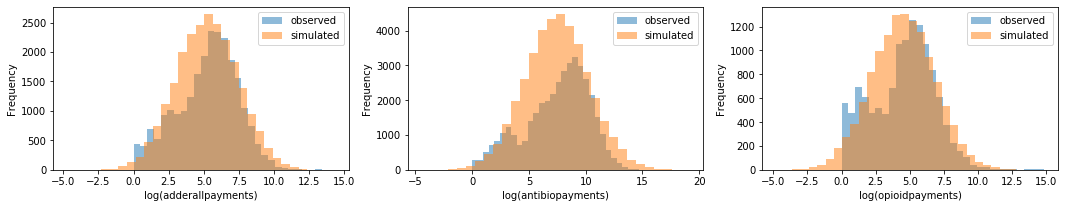

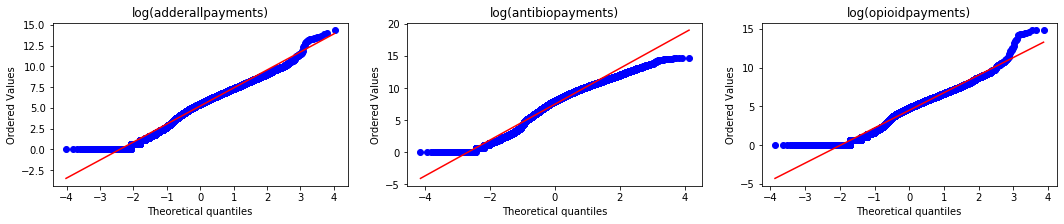

In [19]:
np.random.seed(3)

#patients = {}
patients = {}
payments = {}
for col in df2.columns[1:]:
    clean_col = np.log(abs(df2[col].dropna()) + 1)
    if 'patients' in col:  
#         alpha, loc, beta = st.gamma.fit(clean_col)
#         simulated = st.gamma(alpha, loc=loc, scale=beta).rvs(len(clean_col))
#         patients[col] = (clean_col, simulated)
        
        shape, size = st.expon.fit(clean_col)
        simulated = st.expon(shape, size).rvs(len(clean_col))
        patients[col] = (clean_col, simulated)
        
    else:
        mean, std = st.norm.fit(clean_col)
        simulated = st.norm(mean, std).rvs(len(clean_col))
        payments[col] = (clean_col, simulated)
        
f = 0
fig, ax = plt.subplots(1, 3, figsize=(18,3), squeeze=False)
for key, value in patients.items():
    ax[0,f].hist(value[0], bins=30, alpha=0.5, label = 'observed')
    ax[0,f].hist(value[1], bins=30, alpha=0.5, label = 'simulated')
    ax[0,f].set_xlim([0.5, 4.5])
    ax[0,f].set_xlabel('log(%s)' % key)
    ax[0,f].legend(loc='upper right')
    ax[0,f].set_ylabel('Frequency')
    f += 1

f = 0
fig, ax = plt.subplots(1, 3, figsize=(18,3), squeeze=False)
for key, value in payments.items():
    ax[0,f].hist(value[0], bins=30, alpha=0.5, label = 'observed')
    ax[0,f].hist(value[1], bins=30, alpha=0.5, label = 'simulated')
    ax[0,f].set_xlabel('log(%s)' % key)
    ax[0,f].legend(loc='upper right')
    ax[0,f].set_ylabel('Frequency')
    f += 1

f = 0
fig, ax = plt.subplots(1, 3, figsize=(18,3), squeeze=False)
for key, value in payments.items():
    st.probplot(value[0], plot=ax[0,f])
    ax[0,f].set_title('log(%s)' % (key))
    f += 1

### 4.3	Analysis of Monthly Patient Volumes and Payments 

#### 4.3.1	Box plots of Log Transformed Data

Irrespective of drug type, the minimum values, interquartile ranges and maximum values of patient volumes and payments suggest that they are right-skewed, prompting a log transformation. Box plots of the log-transformed data still showed considerable right-skewness except for log-transformed monthly payments for antibiotics

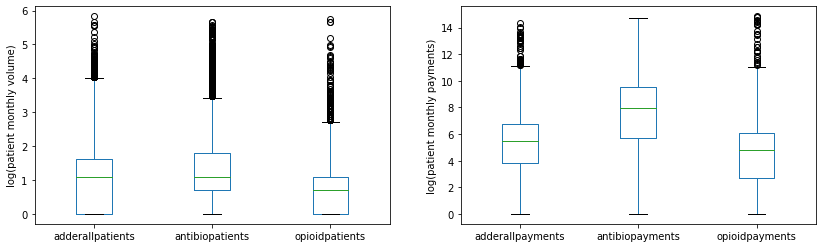

In [20]:
# Box plots of patient monthly volumes and payments per physician 
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df2.loc[:,['adderallpatients','antibiopatients','opioidpatients']].apply(np.log).plot(kind='box', ax=axes[0, 0])
df2.loc[:,['adderallpayments','antibiopayments','opioidpayments']].apply(np.log).plot(kind='box', ax=axes[0, 1])
axes[0,0].set_ylabel('log(patient monthly volume)')
axes[0,1].set_ylabel('log(patient monthly payments)') ;

#### 4.3.2	Empirical Cumulative Density Function (ECDF) of Log Transformed Data

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


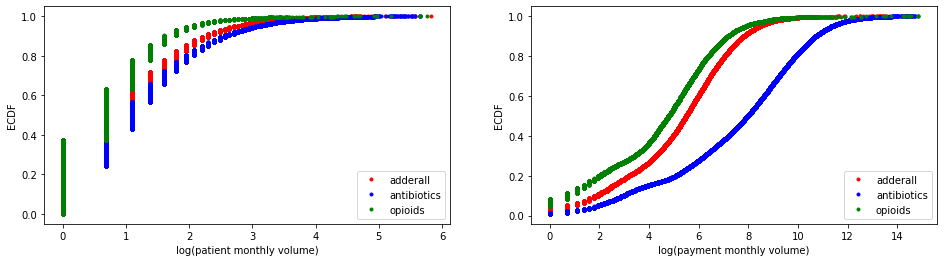

In [21]:
# Generating functions for plotting ecdfs
def ecdf(data):
    '''Generate x and y values for empirical cummulative density function plots'''
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

# Generating x, y values and plotting ecdfs
colors = ['r', 'b', 'g']
plt.figure(figsize=(16,4))
for col, color in zip(df2.columns[1::2], colors):
    x, y = ecdf(df2[col].dropna())
    plt.subplot(1,2,1)
    plt.plot(np.log(x), y, marker='.', linestyle='none', color=color)
    plt.xlabel('log(patient monthly volume)') ; plt.ylabel('ECDF')
    plt.legend(('adderall','antibiotics','opioids'), loc='lower right')

for col, color in zip(df2.columns[2::2], colors):
    x, y = ecdf(df2[col].dropna())
    plt.subplot(1,2,2)
    plt.plot(np.log(x), y, marker='.', linestyle='none', color=color)
    plt.xlabel('log(payment monthly volume)') ; plt.ylabel('ECDF')
    plt.legend(('adderall','antibiotics','opioids'), loc='lower right')

The ecdf plots confirmed information from descriptive summary statistics (Table 4-1), which showed that antibiotics prescribing physicians had the highest monthly average patient volumes and highest monthly payments compared to adderall or opioid prescribing physicians. Additionally, ecdf plots showed that adderall prescribing physicians had higher monthly patient volumes compared to opioid prescribing physicians. 

Interestingly, while descriptive summary statistics showed a higher monthly average payment for opioids compared to adderall, ecdf plots suggest that the 85th percentile or less of adderall prescribers received higher monthly payments compared to payments received by opioid prescribers. This suggests that the source of the higher average monthly payments for opioids compared to adderall is largely associated with payments above the 85th percentile for opioid prescribers. It is suspected that this group of opioid prescribers (> 85th percentile) might be involved in over-prescription practices.

#### 4.3.3	Comparing Means of Monthly Patient Volumes and Payments
The null hypothesis is that there's no difference in the mean monthly patient volumes and payments for adderall and opioids 

In [22]:
np.random.seed(47)

# Computing the differences in means
adderallpatients = df2.adderallpatients.dropna() 
opioidpatients = df2.opioidpatients.dropna() 
adderallpayments = df2.adderallpayments.dropna()
opioidpayments = df2.opioidpayments.dropna()

patients_diff = np.mean(adderallpatients) - np.mean(opioidpatients)
payments_diff = np.mean(opioidpayments) - np.mean(adderallpayments)

# Concatenating samples
conc_patients_mean = np.mean(np.concatenate((adderallpatients, opioidpatients)))
conc_payments_mean = np.mean(np.concatenate((adderallpayments, opioidpayments)))

# Shifting the means of both samples to match the concatenated mean
add_patients_shifted = adderallpatients + conc_patients_mean - np.mean(adderallpatients)
opi_patients_shifted = opioidpatients + conc_patients_mean - np.mean(opioidpatients)
add_payments_shifted = adderallpayments + conc_payments_mean - np.mean(adderallpayments)
opi_payments_shifted = opioidpayments + conc_payments_mean - np.mean(opioidpayments)

# Initializing replicates 
bs_patients_replicates = np.empty(10000)
bs_payments_replicates = np.empty(10000)

# Generating bs_patients replicates
for i in range(10000):
    add_rep = np.random.choice(add_patients_shifted, size=len(add_patients_shifted))
    opi_rep = np.random.choice(opi_patients_shifted, size=len(opi_patients_shifted))
    bs_patients_replicates[i] = np.mean(add_rep) - np.mean(opi_rep)

# Generating bs_payments replicates
for i in range(10000):
    add_rep = np.random.choice(add_payments_shifted, size=len(add_payments_shifted))
    opi_rep = np.random.choice(opi_payments_shifted, size=len(opi_payments_shifted))
    bs_payments_replicates[i] = np.mean(opi_rep) - np.mean(add_rep)

p-value of difference in mean monthly patient volumes = 0          p-value of difference in mean monthly payments = 0.0327


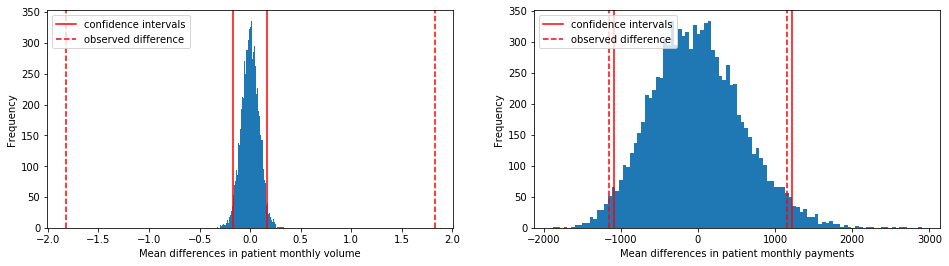

In [23]:
# Computing confidence intervals
conf_int_lower1 = np.percentile(bs_patients_replicates, 2.5)
conf_int_upper1 = np.percentile(bs_patients_replicates, 97.5)
conf_int_lower2 = np.percentile(bs_payments_replicates, 2.5)
conf_int_upper2 = np.percentile(bs_payments_replicates, 97.5)

# Plotting histograms of mean difference replicates
fig, ax = plt.subplots(1, 2, figsize=(16,4), squeeze=False)
ax[0,0].hist(bs_patients_replicates, bins=100)
ax[0,0].axvline(conf_int_lower1, color='red', label='confidence intervals')
ax[0,0].axvline(conf_int_upper1, color='red')
ax[0,0].axvline(patients_diff, color='red', ls='--', label='observed difference')
ax[0,0].axvline(-patients_diff, color='red', ls='--')
ax[0,0].set_xlabel('Mean differences in patient monthly volume')
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(bs_payments_replicates, bins=100)
ax[0,1].axvline(conf_int_lower2, color='red', label='confidence intervals')
ax[0,1].axvline(conf_int_upper2, color='red')
ax[0,1].axvline(payments_diff, color='red', ls='--', label='observed difference')
ax[0,1].axvline(-payments_diff, color='red', ls='--')
ax[0,1].set_xlabel('Mean differences in patient monthly payments')
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Frequency')

# Computing p-values
p1 = np.sum(bs_patients_replicates >= patients_diff) / len(bs_patients_replicates)
p2 = np.sum(bs_payments_replicates >= payments_diff) / len(bs_payments_replicates)
print("p-value of difference in mean monthly patient volumes = %g   \
       p-value of difference in mean monthly payments = %g" % (p1, p2)) ;

While summary descriptive statistics and ecdfs, clearly showed that on average, antibiotic prescribers saw the greatest volume of monthly patients and received the largest monthly payments, the inference for adderall and opioid prescribers were not as clear. For instance, descriptive summary statistics suggest that despite seeing fewer patients per month, on average, opioid prescribers received higher monthly payments than adderall prescribers. However, ecdfs of log-transformed data suggest that except for a few outlier opioid prescribers, adderall prescribers received larger monthly payments than opioid prescribers. Hence, to resolve this, it was important to test for a significant difference in mean monthly patient volumes and payments for adderall and opioids.

Bootstrap-assisted hypothesis test showed significant differences in monthly patient volumes (p = 0.0) and monthly payments (p = 0.0327) at the 5% significance level.

### 4.4	Analysis of Payment Per Patient (Payment Rate)
Since the data suggests a higher revenue margin for prescribing antibiotics and opioids compared to adderall, the average monthly payments received per physician per patient per dug was calculated. Hence, three new columns (variables) were created for the three drug types.

In [24]:
# Making a copy of df2
df3 = df2.copy()

# Creating three new columns to capture the average payments received per patient per physician per drug type
df3['adderall_pay_rate'] = df3['adderallpayments'] / df3['adderallpatients']
df3['antibio_pay_rate'] = df3['antibiopayments'] / df3['antibiopatients']
df3['opioid_pay_rate'] = df3['opioidpayments'] / df3['opioidpatients']

#### 4.4.1	Descriptive Summary of Payment Rates

In [25]:
# Descriptive stats of payments received per patient per physician per drug type
df3.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].describe()

,adderall_pay_rate,antibio_pay_rate,opioid_pay_rate
count,23889.000000,39829.000000,12588.000000
mean,259.683273,3017.455872,250.260730
std,834.308953,8636.150750,1291.643871
min,-5885.500000,-9400.000000,-8.000000
25%,21.714286,131.000000,9.000000
50%,85.095238,887.000000,62.500000
75%,227.300000,3108.250000,197.000000
max,42753.000000,649413.000000,46170.350000


In [26]:
# Calculating coefficient of variation of payment rates
adderall_cv = st.variation(df3.adderall_pay_rate.dropna())
antibio_cv = st.variation(df3.antibio_pay_rate.dropna())
opioid_cv = st.variation(df3.opioid_pay_rate.dropna())
print('Coefficient of variation in payment per patient for adderall = %03f' % adderall_cv)
print('Coefficient of variation in payment per patient for antibitotics = %03f' % antibio_cv)
print('Coefficient of variation in payment per patient for opioids = %03f' % opioid_cv)

Coefficient of variation in payment per patient for adderall = 3.212727
Coefficient of variation in payment per patient for antibitotics = 2.862028
Coefficient of variation in payment per patient for opioids = 5.160988


Descriptive summary statistics of payment rates showed that antibiotic prescribers had a significantly higher average monthly payment rate of `$`3017 compared to `$`259 for adderall prescribers and `$`250 for opioid prescribers. The payment rates also showed considerable variation especially for opioids, which had a coefficient of variation of 5.15 compared to adderall and antibiotics with 3.21 and 2.86, respectively.

#### 4.4.2	Box plots and ECDFs of Payment Rates

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


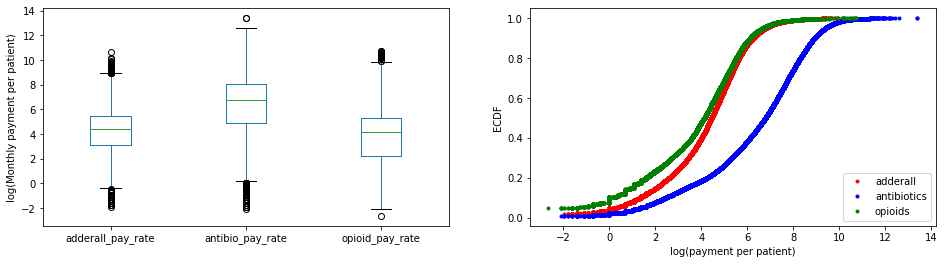

In [27]:
# Creating payrate slice of dataframe 
df3_rate = df3.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].apply(np.log)

# Box plots
fig, axes = plt.subplots(1, 2, figsize=(16,4), squeeze=False) 
df3_rate.plot(kind='box', ax=axes[0,0])
axes[0,0].set_ylabel('log(Monthly payment per patient)');

# Generating x, y values and plotting ecdfs
colors = ['r', 'b', 'g']
for col, color in zip(df3_rate.columns, colors):
    x, y = ecdf(df3[col].dropna())
    plt.subplot(1,2,2)
    plt.plot(np.log(x), y, marker='.', linestyle='none', color=color)
    plt.xlabel('log(payment per patient)') ; plt.ylabel('ECDF')
    plt.legend(('adderall','antibiotics','opioids'), loc='lower right')

Box plots and ecdfs show that physicians received significantly more revenue per patient by prescribing antibiotics. However, the mean pay rate from opioid patients was only slightly higher than that for adderall patients. Bootstrapping will be used to further determine the signifcance of the difference in payment per patient between adderall and opioid patients.

#### 4.4.3	Comparing means of monthly payments per patient
The null hypothesis is that there's no difference in the mean avaerage payment per patient for adderall and opioids 

In [28]:
np.random.seed(47)

# Computing the differences in mean payment per patient
adderall_payrate = df3.adderall_pay_rate.dropna()
opioid_payrate = df3.opioid_pay_rate.dropna() 

payrate_diff = np.mean(opioid_payrate) - np.mean(adderall_payrate)

# Concatenating samples
conc_payrate_mean = np.mean(np.concatenate((adderall_payrate, opioid_payrate)))

# Shifting the means of both samples to match the concatenated mean
add_payrate_shifted = adderall_payrate + conc_payrate_mean - np.mean(adderall_payrate)
opi_payrate_shifted = opioid_payrate + conc_payrate_mean - np.mean(opioid_payrate)

# Initializing replicates 
bs_payrate_replicates = np.empty(10000)

# Generating bs_payrate replicates
for i in range(10000):
    add_rep = np.random.choice(add_payrate_shifted, size=len(add_payrate_shifted))
    opi_rep = np.random.choice(opi_payrate_shifted, size=len(opi_payrate_shifted))
    bs_payrate_replicates[i] = np.mean(opi_rep) - np.mean(add_rep)

In [29]:
# Computing confidence intervals
conf_int_lower = np.percentile(bs_payrate_replicates, 2.5)
conf_int_upper = np.percentile(bs_payrate_replicates, 97.5)

p-value of difference in mean payment per patient = 0.7671


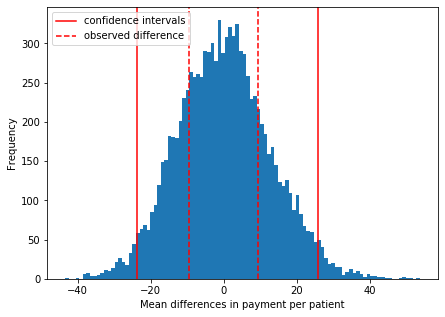

In [30]:
# Plotting histograms of mean difference replicates
plt.figure(figsize=(7,5))
plt.hist(bs_payrate_replicates, bins=100)
plt.axvline(conf_int_lower, color='red', label='confidence intervals')
plt.axvline(conf_int_upper, color='red')
plt.axvline(payrate_diff, color='red', ls='--', label='observed difference')
plt.axvline(-payrate_diff, color='red', ls='--')
plt.xlabel('Mean differences in payment per patient')
plt.legend(loc='upper left')
plt.ylabel('Frequency');

# Computing p-value
p = np.mean(bs_payrate_replicates >= payrate_diff)
#p_ = np.sum(bs_payrate_replicates >= payrate_diff) / len(bs_payrate_replicates)

print('p-value of difference in mean payment per patient =',p)

The bootstrapped hypothesis test suggests that there is no signifcant difference (at the 5% signifcance level) between the payments received per patient for adderall and opioids.

Hence, it is interesting that there was no significant difference in average monthly payments per patients between adderall and opioid prescribers despite opioid prescribers having a signicantly higher average monthly payment and a signicantly lower average monthly patient volume compared to adderall prescribers. 

### 4.5	Correlation Matrix of Variables

In [31]:
# Aggregating dataset by date to summarize the dataset prior to correlation matrix analyses
df3.groupby('Date').sum().tail() 

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments,adderall_pay_rate,antibio_pay_rate,opioid_pay_rate
Date,,,,,,,,,
2017-06-01,2124.0,517995.0,4613.0,16622137.0,575.0,105434.0,103926.451973,2.153530e+06,42002.476722
2017-07-01,1656.0,468758.0,4231.0,15072131.0,480.0,92645.0,96522.743415,1.744820e+06,35908.349595
2017-08-01,1581.0,445137.0,3295.0,10346447.0,530.0,285853.0,83010.978119,1.482375e+06,37376.628221
2017-09-01,1257.0,350291.0,2604.0,8705042.0,317.0,52527.0,49063.363804,9.391781e+05,16235.564938
2017-10-01,6.0,1681.0,10.0,690.0,0.0,0.0,280.166667,6.900000e+01,0.000000


Entries for the month of 2017-10 are incomplete. Hence, thsi month will be excluded from time series analyses

In [32]:
# Creating a new dataset that excludes the month of 2017-10
df3_d = df3.loc[:'2017-09',:].groupby('Date').sum()

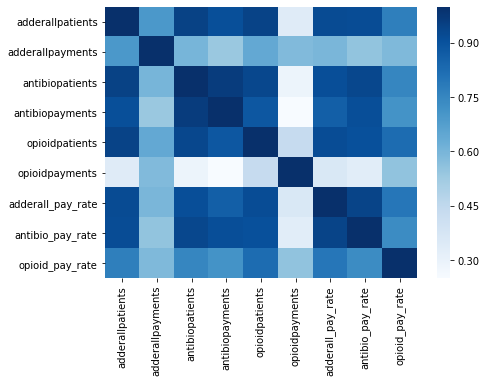

In [33]:
# Heat map visualization of correlation matrix
df3_corr = df3_d.corr()
plt.figure(figsize=(7,5))
sns.heatmap(df3_corr, cmap='Blues') ;

         r = 0.696586066062956                   r = 0.9640742452980036                   r = 0.4392149770816451


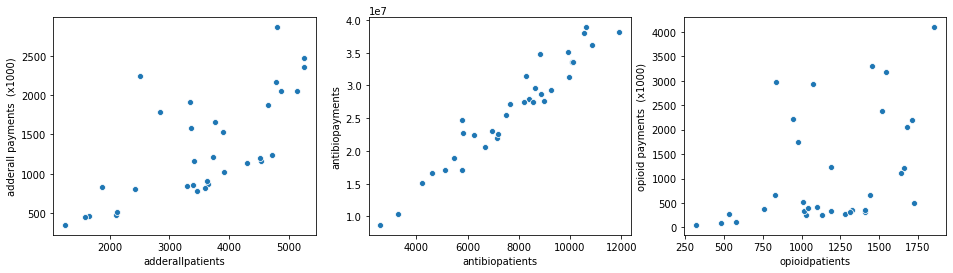

In [34]:
# Visualization of scatterplots between patient volumes and payments per drug 
adderall_ = df3_d.loc[:,['adderallpatients','adderallpayments']]
adderall_['adderallpayments'] = adderall_['adderallpayments'] / 1000
antibio_ = df3_d.loc[:,['antibiopatients','antibiopayments']]
opioid_ = df3_d.loc[:,['opioidpatients','opioidpayments']]
opioid_['opioidpayments'] = opioid_['opioidpayments'] / 1000
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x='adderallpatients', y='adderallpayments', data=adderall_)
plt.ylabel('adderall payments  (x1000)')
plt.subplot(1,3,2)
sns.scatterplot(x='antibiopatients', y='antibiopayments', data=antibio_)
plt.subplot(1,3,3)
sns.scatterplot(x='opioidpatients', y='opioidpayments', data=opioid_)
plt.ylabel('opioid payments  (x1000)');

adderall_r = np.corrcoef(adderall_.adderallpatients, adderall_.adderallpayments)
antibio_r = np.corrcoef(antibio_.antibiopatients, antibio_.antibiopayments)
opioid_r = np.corrcoef(opioid_.opioidpatients, opioid_.opioidpayments)

print('{:>30} {:>40} {:>40}'.format('r = ' + str(adderall_r[0,1]), 'r = ' + str(antibio_r[0,1]), 'r = ' + str(opioid_r[0,1])))

Correlation analysis showed a strong relationship between antibiotic patient volumes and antibiotic payments, which had a correlation coefficient (_r_) of 0.964. This suggests that despite having the highest monthly payment rate, antibiotic prescribers generally charged patients based on volume. Hence, one could easily predict the monthly payment to an antibiotic prescriber based on the monthly patient volume. This was not the case with adderall and opioid prescribers, which showed weak correlations between patient volumes and payments. This suggests that other factors, besides patient volume, are responsible for the variation in monthly payments for adderall and opioids.

### 4.6	Identification of Over Prescribers
A function (suspect_phys_finder) will be created to identify potential over prescribers of adderall, antibiotics and opioids. Summary of the function’s analytical steps are as follows:
1.	For a given drug group, select prescribers that belong in the 80th percentile and above for monthly payments 
2.	For each prescriber selected from step 1, slice out the prescription history of given drug
3.	For prescribers with at least 3 active months, calculate the r between payments and patient volume
4.	From the list of prescribers from step 1, select those with low r (i.e. those with _r_ < 0.7 between payments and patients)

In [35]:
# Grouping the dataset by physicianid to show a total of 3010 unique physicians in the dataset
df3_p = df3.groupby('physicianid').mean()
df3_p.shape

(3010, 9)

In [36]:
# Creating subset datasets from df1_p according to drug type
adderall = df3_p.loc[:,['adderallpatients', 'adderallpayments','adderall_pay_rate']].dropna()
antibio = df3_p.loc[:,['antibiopatients', 'antibiopayments','antibio_pay_rate']].dropna()
opioid = df3_p.loc[:,['opioidpatients', 'opioidpayments','opioid_pay_rate']].dropna()

In [37]:
# Sorting the datasets based on monthly payments
adderall.sort_values('adderallpayments', inplace=True)
antibio.sort_values('antibiopayments', inplace=True)
opioid.sort_values('opioidpayments', inplace=True)

In [38]:
# Creating a function that identifies physicians with unsual prescription patterns: suspect_phys_finder

def suspect_phys_finder(datasets, percentile=50, pearson_r=0.5):
    
    '''Selects physicians with mean monthly payments above selected percentile, with 3 or more active months 
        and with pearson's correlation coefficent between payments and patient volumes less than selected r'''
    
    drugs = ['adderall', 'antibio', 'opioid']
    xs_add, xs_antibio, xs_opi = [],[],[]
    
    # Select dataset from a list: datasets
    for data in datasets:
        
        # Select drug type from a list: drugs
        for drug in drugs:
            
            # Select drug type based on match to column name
            if drug in data.columns[1]:
                
                # Calculate value of selected percentile for mean monthly payments: drug_perc 
                drug_perc = np.percentile(data[data.columns[2]], percentile)
                
                # Identifying physicians with mean monthly payments larger than percentile value: drug_over_perc 
                drug_over_perc = data[data[data.columns[2]] > drug_perc]
                
                # loop through the list of physicians in drug_over_perc
                for phys in drug_over_perc.index:
                    
                    # Slice out the prescription history of selected physician in new df: phys_df
                    phys_df = df3.loc[(df3['physicianid'] == phys),:].dropna()
                    
                    # Checking that the physician has at least 3 active months
                    if len(phys_df) >= 3:
                        
                        # Compute pearson's correlation coefficent of monthly payments and patient volume
                        x = phys_df.loc[:,data.columns[0]]
                        y = phys_df.loc[:,data.columns[1]]
                        r_corr = np.corrcoef(x, y)
                        
                        # Select physician id if coefficient is less than chosen r
                        if r_corr[0,1] is not None and r_corr[0,1] < pearson_r:
                            if drug == 'adderall': 
                                xs_add.append(phys)
                            elif drug == 'antibio':
                                xs_antibio.append(phys)
                            else:
                                xs_opi.append(phys)
         
    # Store selected physician ids in dictionary: xs_phys
    xs_phys = {'adderall':xs_add, 'antibio':xs_antibio, 'opioid':xs_opi}
       
    return xs_phys    

In [39]:
# Using the function to identify physicians with unusual prescription patterns
datasets = [adderall, antibio, opioid]
xs_phys = suspect_phys_finder(datasets, percentile=80, pearson_r=0.7)

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [44]:
# Identifying over-prescribers
xs_phys_all = set(xs_phys['adderall']).intersection(set(xs_phys['antibio']), set(xs_phys['opioid']))
xs_phys_add_anti = set(xs_phys['adderall']).intersection(set(xs_phys['antibio']))
xs_phys_add_opi = set(xs_phys['adderall']).intersection(set(xs_phys['opioid']))
xs_phys_anti_opi = set(xs_phys['antibio']).intersection(set(xs_phys['opioid']))
all_ = df3_p.loc[df3_p.adderallpatients.notnull() & df3_p.antibiopatients.notnull() & df3_p.opioidpatients.notnull()]
add_opi = df3_p.loc[df3_p.adderallpatients.notnull() & df3_p.opioidpatients.notnull()]
add_anti = df3_p.loc[df3_p.adderallpatients.notnull() & df3_p.antibiopatients.notnull()]
anti_opi = df3_p.loc[df3_p.antibiopatients.notnull() & df3_p.opioidpatients.notnull()]
print('Physicians likely overprescribing adderall = %d out of %d' % (len(xs_phys['adderall']), len(adderall)))
print('Physicians likely overprescribing antibiotics = %d out of %d' % (len(xs_phys['antibio']), len(antibio)))
print('Physicians likely overprescribing opioids = %d out of %d' % (len(xs_phys['opioid']), len(opioid)))
print('Physicians likely overprescribing all drugs = %d out of %d' % (len(xs_phys_all), len(all_)))
print('Physicians likely overprescribing both adderall and antibiotics = %d out of %d' % (len(xs_phys_add_anti), len(add_anti)))
print('Physicians likely overprescribing both adderall and opioids = %d out of %d' % (len(xs_phys_add_opi), len(add_opi)))
print('Physicians likely overprescribing both opioids and antibiotics = %d out of %d' % (len(xs_phys_anti_opi), len(anti_opi)))

Physicians likely overprescribing adderall = 143 out of 2769
Physicians likely overprescribing antibiotics = 118 out of 2989
Physicians likely overprescribing opioids = 139 out of 2448
Physicians likely overprescribing all drugs = 0 out of 2363
Physicians likely overprescribing both adderall and antibiotics = 10 out of 2769
Physicians likely overprescribing both adderall and opioids = 16 out of 2363
Physicians likely overprescribing both opioids and antibiotics = 14 out of 2441


### 4.7	Time Series Analyses of Patient Volumes and Payments

The average monthly patient volumes, average monthly payments, and average payment rates did not show a trend and appeared stationary irrespective of drug type over the period. For instance, the average monthly patient volume for antibiotic prescribers was approximately 6.1 in Jan 2015 and approximately 6.9 in Aug 2017. Additionally, the month of May 2017 had the highest average monthly patient volume of approximately 7.3 followed by Jun 2015 with approximately 7.1 for antibiotic prescribers.

As expected, the average monthly patient volumes, average monthly payments and average monthly payment rates for antibiotic prescribers were consistently higher than those of adderall and opioid prescribers. Subsequently, for patient volumes, the average monthly patient volumes for adderall prescribers were consistently higher than that of opioid prescribers. However, for payments, the average monthly payments were about the same for adderall and opioid prescribers except for 10 months where the average payments were significantly higher for opioid prescribers compared to adderall prescribers (Figure 4-6b).

Interestingly, the total monthly patient volumes and payments showed a decreasing trend, especially for antibiotic prescribers. This was later explained by the general decreasing number of prescribers.

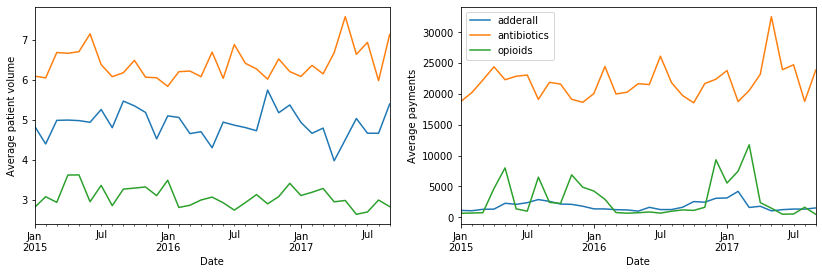

In [41]:
# Grouping the data by date and aggregating with mean. 
df4 = df3.loc[:'2017-09',:]
df4_d_avg = df4.groupby('Date').mean()

# Plotting time series of average monthly patient volumes and payments
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df4_d_avg.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0], legend=None)
df4_d_avg.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])
axes[0,0].set_ylabel('Average patient volume')
axes[0,1].set_ylabel('Average payments') 
axes[0,1].legend(('adderall', 'antibiotics', 'opioids'));

The average monthly payments and average monthly patient volumes appear to be stationary over the period and the differences in means are consistent with earlier observations.

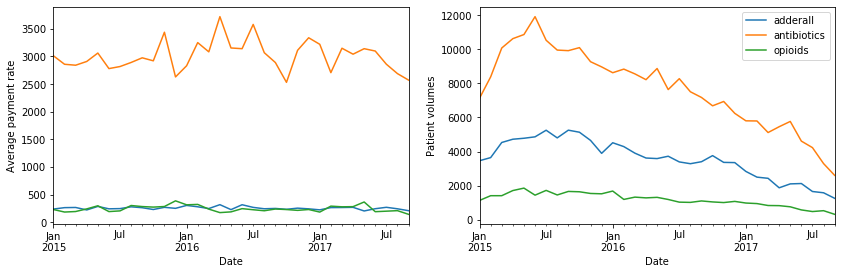

In [42]:
# Plotting tine series of average monthly payment rate
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df4_d_avg.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].plot(ax=axes[0,0], legend=None)
axes[0,0].set_ylabel('Average payment rate') 

# Grouping the data by date, aggregating with sum and plotting time series of patient volumes. 
df4_d_sum = df4.groupby('Date').sum()
df4_d_sum.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 1], legend=None)
axes[0,1].set_ylabel('Patient volumes')
axes[0,1].legend(('adderall', 'antibiotics', 'opioids'));

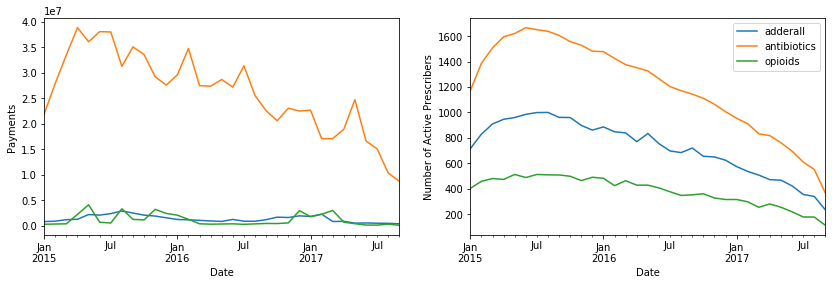

In [43]:
# Plotting time series of payments 
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df4_d_sum.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 0], legend=False)
axes[0,0].set_ylabel('Payments') 

# Plotting time series of number of active prescribers
df4.loc[df4.adderallpatients.notnull(),'physicianid'].resample('M').nunique().plot(ax=axes[0,1])
df4.loc[df4.antibiopatients.notnull(),'physicianid'].resample('M').nunique().plot(ax=axes[0,1])
df4.loc[df4.opioidpatients.notnull(),'physicianid'].resample('M').nunique().plot(ax=axes[0,1])
axes[0,1].legend(('adderall', 'antibiotics', 'opioids'))
axes[0,1].set_ylabel('Number of Active Prescribers')
axes[0,1].legend(('adderall', 'antibiotics', 'opioids'));

Surprisingly, unlike the average monthly aggregates, aggregating by sum shows a steady decline in total patient volumes for all drug types over the period. Additionally, while the total monthly payments for antibiotics also appeared to be steadily declining over the period, total monthly payments for adderall and opioids appeared stationary.

It is likely that the impact of outliers might have skewed the means resulting in the observation of stationary values for average patient volumes despite a steady decline in total patient volumes over the period.

## 5. Conclusion and Next Steps

This report details the steps of data cleaning and wrangling as well as exploratory data analysis via visualizations and statistical methods. 

Important insights generated from the analyses include:

* On average, antibiotic prescribers see more patients per month and generate more revenue compared to adderall and opioid prescribers
* While patient volume alone is a strong predictor of antibiotic prescription revenues, other factors, besides patient volume, appear to be predictors of adderall and opioid prescription revenues  
* Adderall prescribers see more patients per month than opioid prescribers but generate less revenue
* The higher monthly revenues generated by opioid prescribers compared to adderall prescribers is most likely due to a small set of opioid over-prescribers
* Potential over-prescribers were identified using a function that selects prescribers above the 80th percentile for payments and with weak correlations between patient volumes and payments  
* While the average monthly patient volume and average monthly payments were relatively stationary over the period, the total monthly patients and total monthly payments declined. This was attributed to a decline in the number of prescribers.     

The next step of this project is to develop, evaluate and select machine learning models to classify prescribers based on their prescription profiles. This will be used to compare with prescribers identified 